# Analyse Exploiratoire des données

In [31]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

In [32]:
print(data.shape)
print(data.head())

(15120, 56)
       Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  242642       2881     130     22                               210   
1  309891       3005     351     14                               242   
2  287847       3226      63     14                               618   
3  516307       3298     317      8                               661   
4  124860       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            250             221             88  ...       

## Propreté des données

### Données manquantes

In [3]:
print(data.isnull().sum())

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Il n'y a pas de données manquantes.

### Données redondantes

In [4]:
print(data.loc[data['Id'].duplicated(keep=False),:])
#Affiche les lignes de data qui ont le même 'Id'

Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]


Il n'y a pas a priori de données redondantes. Les données sont très propres, il semble qu'il n'y ait pas besoin de les nettoyer pour débuter.

## Analyse univariée

### Distributions des attribus catégoriels 

#### Couverture forestière

On analyse la distribution des classes cible (le type de couverture forestière) pour voir si elle est équilibrée ou déséquilibrée.

Distribution des classes cibles :
Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64


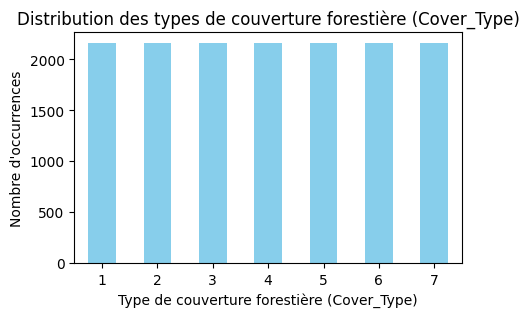

In [33]:
# On compte les occurrences de chaque classe
class_counts = data['Cover_Type'].value_counts()
print("Distribution des classes cibles :")
print(class_counts)

# Bar plot de la distribution des classes
plt.figure(figsize=(5, 3))
class_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des types de couverture forestière (Cover_Type)")
plt.xlabel("Type de couverture forestière (Cover_Type)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=0)
plt.show()

On remarque que les classes son équilibrées. On peut donc utiliser des métriques de classification classiques. Cependant, on peut imaginer que cela n'est pas le cas dans la réalité et donc dans les données de test. Il faudra donc peut-être prendre en compte que les données ne sont pas aussi équilibrées que dans le jeu d'entraînement.

#### Soil_Type

On veut comprendre la répartition des différents types de sol dans les données. 

Si certains types de sol sont plus fréquents dans certains types de couvert forestier, cela pourrait être un indicateur important pour prédire la classe cible (Cover_Type).

Connaître la distribution des types de sol peut aider à choisir la bonne façon de les intégrer dans le modèle (par exemple, en tant que variables binaires individuelles ou combinées).


Nombre d'occurrences pour chaque type de sol :
Soil_Type1      339
Soil_Type2      627
Soil_Type3     1006
Soil_Type4      839
Soil_Type5      181
Soil_Type6      679
Soil_Type7        1
Soil_Type8        2
Soil_Type9        4
Soil_Type10    2096
Soil_Type11     376
Soil_Type12     260
Soil_Type13     513
Soil_Type14     173
Soil_Type15       0
Soil_Type16     106
Soil_Type17     640
Soil_Type18      44
Soil_Type19      53
Soil_Type20     132
Soil_Type21      10
Soil_Type22     332
Soil_Type23     742
Soil_Type24     265
Soil_Type25       6
Soil_Type26      48
Soil_Type27       8
Soil_Type28       7
Soil_Type29    1308
Soil_Type30     736
Soil_Type31     304
Soil_Type32     663
Soil_Type33     619
Soil_Type34      18
Soil_Type35     103
Soil_Type36      14
Soil_Type37      32
Soil_Type38     744
Soil_Type39     634
Soil_Type40     456
dtype: int64


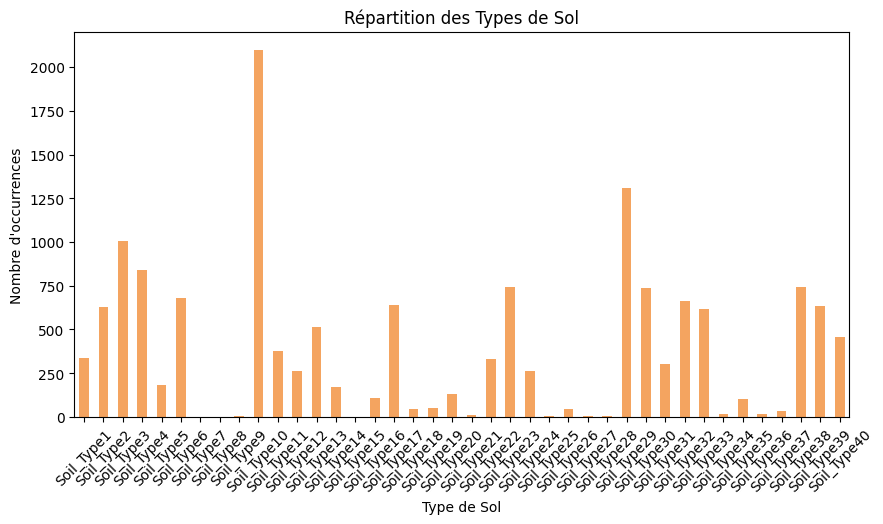

In [34]:
# Colonnes de types de sol
soil_columns = [col for col in data.columns if col.startswith('Soil_Type')]

# On compte les occurences
soil_counts = data[soil_columns].sum()
print("Nombre d'occurrences pour chaque type de sol :")
print(soil_counts)

plt.figure(figsize=(10, 5))
soil_counts.plot(kind='bar', color='sandybrown')
plt.title("Répartition des Types de Sol")
plt.xlabel("Type de Sol")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Les types de sol fréquents sont : 10, 29, 3, 4, 38, 30

Les types sols avec 0 occurences sont : 15, 7, 8, 9, 25, 28, 27

Proposition pour gérer cela : 
- combiner certains types de sol extrêmement rares
- combiner les types de sol qui sont très similaires : Chaque numéros correspond à une description, on peut regrouper les numéros avec des mots clés similaires dans leur description
- faire de la pondération, utiliser des poids pour équilibrer lors de l'apprentissage. Cela pourrait être pertinent si ces types rares sont néanmoins importants pour certaines classes de couverture forestière


#### Wilderness_Area

On étudie la répartition des zones de nature sauvage (Wilderness_Area), de la même manière que les types de sol.

Nombre d'occurrences pour chaque zone de nature sauvage :
Wilderness_Area1    3568
Wilderness_Area2     569
Wilderness_Area3    6302
Wilderness_Area4    4681
dtype: int64


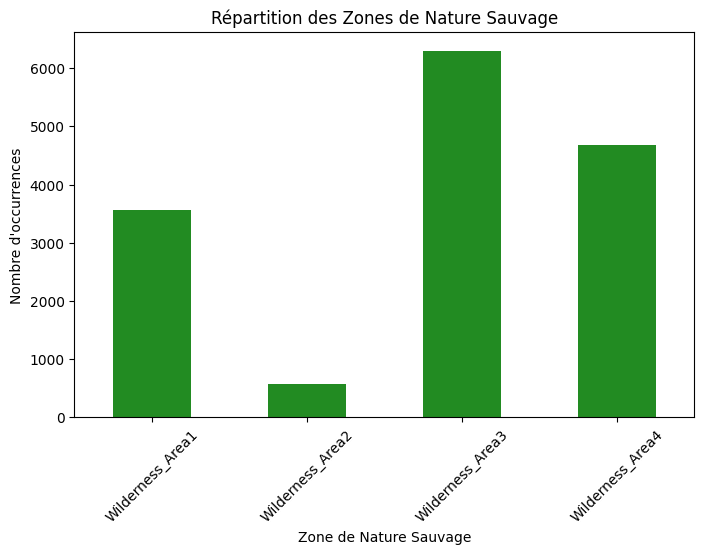

In [35]:
# Colonnes de Wilderness Area
wilderness_columns = [col for col in data.columns if col.startswith('Wilderness_Area')]

# On compte les occurrences pour chaque zone de nature sauvage
wilderness_counts = data[wilderness_columns].sum()
print("Nombre d'occurrences pour chaque zone de nature sauvage :")
print(wilderness_counts)

plt.figure(figsize=(8, 5))
wilderness_counts.plot(kind='bar', color='forestgreen')
plt.title("Répartition des Zones de Nature Sauvage")
plt.xlabel("Zone de Nature Sauvage")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Wilderness_Area2 est beaucoup moins fréquente que les 3 autres. Cela pourrait être un indicateur important pour prédire la classe cible (Cover_Type).

### Distributions des attribus quantitatifs et outliers

Les données aberantes peuvent être repérées pour les attributs quantitatifs. Deux indicateurs peuvent être utilisés :
- Le Z-score : c'est l'écart d'une donnée à la moyene exprimée en écart-type : $Z = \frac{x-\mu}{\sigma}$. Des données possédants un Z-score inférieur à -3 ou supérieur à 3 sont susceptibles d'être erronées.
- Le diagramme boite à moustache qui fait ressortir les valeurs supérieures à $Q_3 + 1.5\Delta Q$ ou inférieures à supérieures à $Q_1 - 1.5\Delta Q$, où $Q_1$, $Q_3$ et $\Delta Q$ sont respectivement le premier, troisième quartile et l'écart inter-quartile.

On va, avant de calculer ces indicateurs, renormaliser les données entre 0 et 1 pour des questions de praticité d'affichage. Cette renormalisation ne modifie pas les indicateurs précédents.


In [36]:
data_prov = data.copy()
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

for col in cols:
    data_prov[col] = (data_prov[col]-np.min(data_prov[col]))/(np.max(data_prov[col])-np.min(data_prov[col]))

In [38]:
#Attributs à analyser

df_zscore = pd.DataFrame() #DataFrame qui contiendra les z-score
for col in cols:
    df_zscore[col] = stats.zscore(data_prov[col])
    print(f"{col} : max={np.max(df_zscore[col])} ; min={np.min(df_zscore[col])}")

Elevation : max=2.628547215189024 ; min=-2.080331292219321
Aspect : max=1.8604176572021156 ; min=-1.420011380506091
Slope : max=3.918678423255459 ; min=-1.9400194579005843
Horizontal_Distance_To_Hydrology : max=5.486048216311695 ; min=-1.0917209604757603
Vertical_Distance_To_Hydrology : max=8.431426108909506 ; min=-3.028549910489725
Horizontal_Distance_To_Roadways : max=3.822694256859576 ; min=-1.2914994584651323
Hillshade_9am : max=1.337292780005697 ; min=-5.255957570938961
Hillshade_Noon : max=1.541210556496279 ; min=-5.258068588515639
Hillshade_3pm : max=2.529337957970688 ; min=-2.9190667488810202
Horizontal_Distance_To_Fire_Points : max=4.986245605911669 ; min=-1.367864685306218


Les attributs qui sont les plus susceptibles de présenter des valeurs abberantes sont :
- 'Slope'
- 'Horizontal_Distance_To_Hydrology'
- 'Vertical_Distance_To_Hydrology'
- 'Horizontal_Distance_To_Roadways'
- 'Hillshade_9am'
- 'Hillshade_Noon'
- 'Horizontal_Distance_To_Fire_Points'

Pour completer ce premier constat, on va désormais afficher les boîtes à moustaches, ainsi que les histogrammes de chaque attributs.

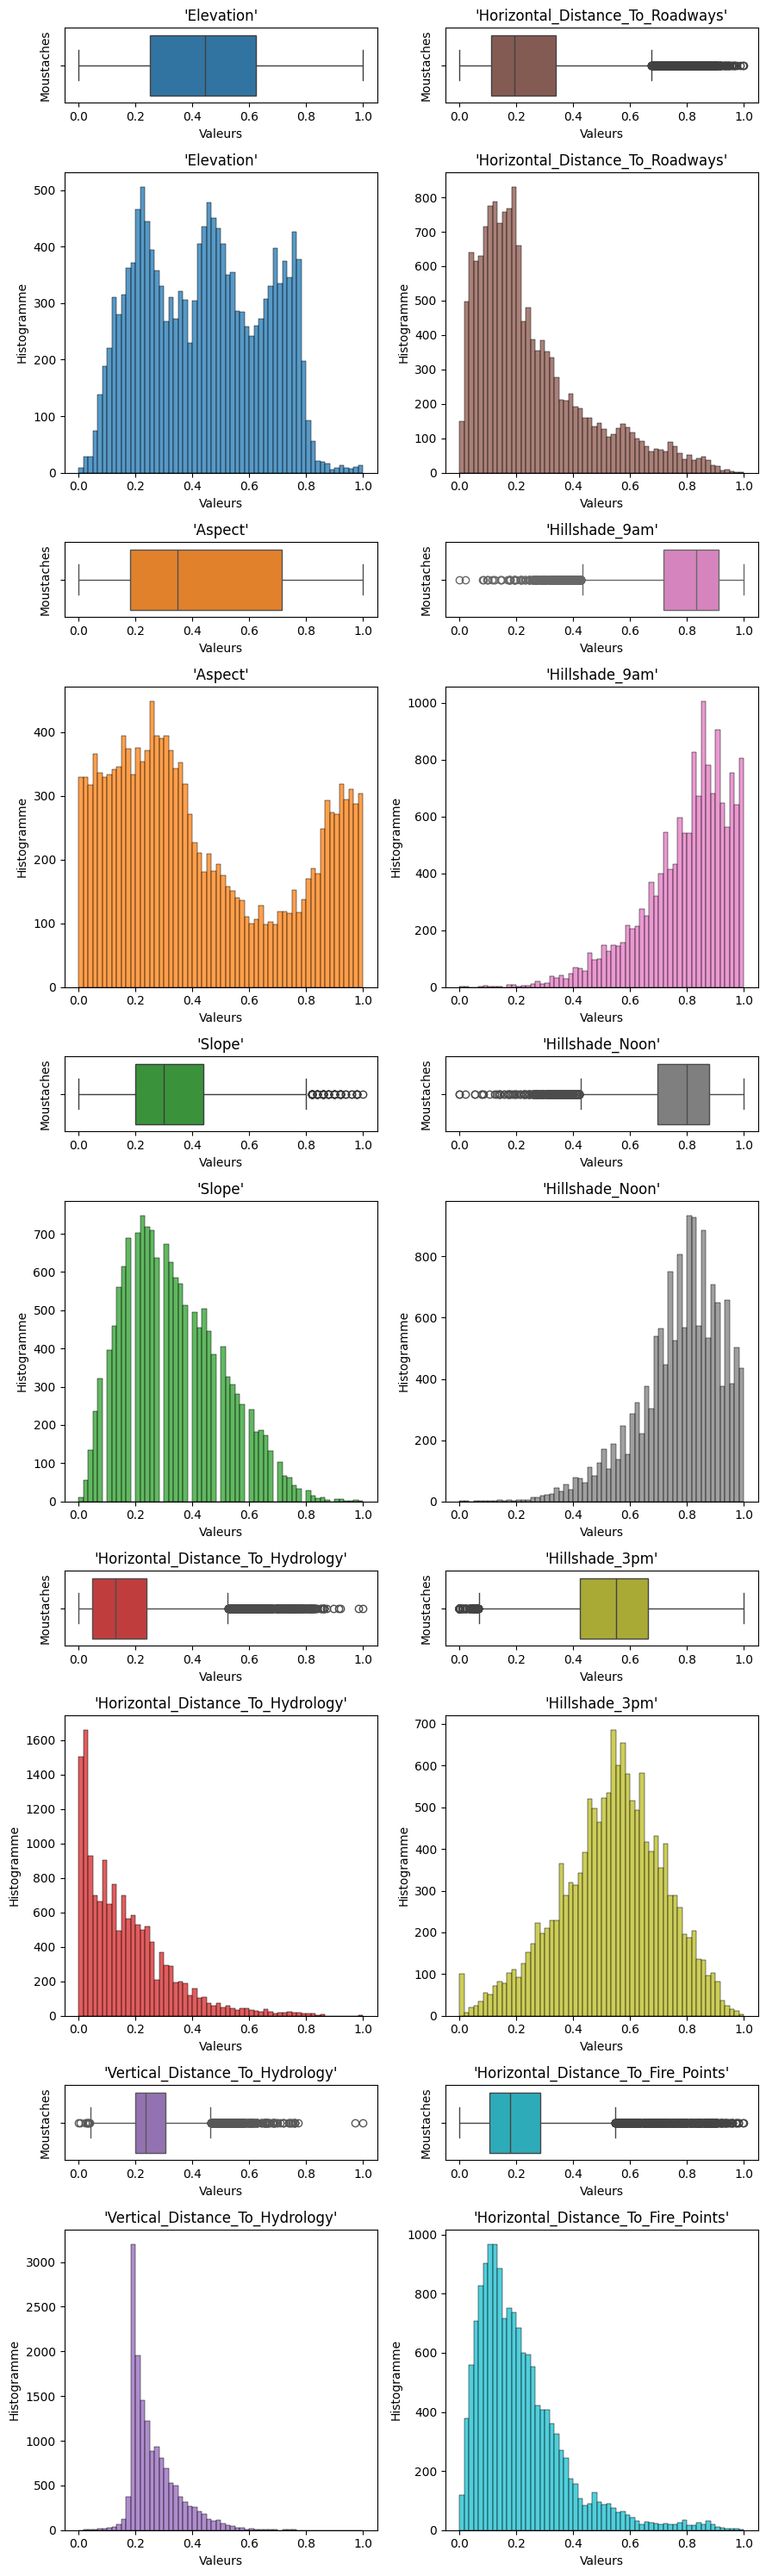

In [39]:
from matplotlib.gridspec import GridSpec

#Liste de couleurs pour faire plaisir aux yeux
colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

fig = plt.figure(figsize=(9, 30))
#On fait 20 sous figures (10 boîte à moustache et 10 histogramme)
#Et on laisse plus de hauter pour les histogrammes pour la visibilité
gs = GridSpec(10, 2, figure=fig, height_ratios=[1, 4] * 5) 

# Boucle sur chaque attributs pour créer les sous-figures
for i in range(len(cols)):
    # Boîte à moustaches
    ax_box = fig.add_subplot(gs[(i * 2)%10 , (i * 2)//10])  # Position pour la boîte à moustaches
    sns.boxplot(data_prov[cols[i]], ax=ax_box, orient="h", color=colors[i])
    ax_box.set_title(f"'{cols[i]}'")
    ax_box.set_xlabel('Valeurs')
    ax_box.set_ylabel('Moustaches')

    # Histogramme
    ax_hist = fig.add_subplot(gs[(i * 2 + 1)%10, (i * 2 + 1)//10])  # Position pour l'histogramme
    sns.histplot(data_prov[cols[i]], bins=60, ax=ax_hist, color=colors[i])
    ax_hist.set_title(f"'{cols[i]}'")
    ax_hist.set_xlabel('Valeurs')
    ax_hist.set_ylabel('Histogramme')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


On pourrait être tenté de penser que tous les points en dehors des boîtes à moustaches sont des données aberantes à supprimer. Cependant, à l'aide des histogrammes, les distributions des attributs ressortent assez distinctement, et certains points, bien qu'en dehors de la boîte à moustache, semblent être vraisemblables. En particulier, lorsque la distribution qui se dessine présente une zone de faible densité, certains points répartis selon cette distribution peuvent se retrouver en dehors de l'intervale $\left[Q_1 - 1.5\Delta Q, Q_3 + 1.5\Delta Q\right]$.

On peut faire ressortir des cas de données qui parraisent malgré tout aberantes : 
- les deux plus grandes valeurs de 'Vertical_Distance_To_Hydrology'
- Dans une moindre mesure, les deux plus grandes valeurs de 'Horizontal_Distance_To_Hydrology' et les deux plus faibles de 'Hillshade_9am'

On peut d'ailleurs observer que ces six valeurs 'aberantes' correspondent à six entrées différentes :

In [40]:
A = data['Vertical_Distance_To_Hydrology'].nlargest(2).values #Les deux plus grandes valeurs de la colonne
B = data['Horizontal_Distance_To_Hydrology'].nlargest(2).values
C = data['Hillshade_9am'].nsmallest(2).values #Les deux plus petites valeurs de la colonne

#Extraction du data frame des lignes correspondantes à ces valeurs
data_top_2 = data[data['Vertical_Distance_To_Hydrology'].isin(A)|
                  data['Horizontal_Distance_To_Hydrology'].isin(B)|
                  data['Hillshade_9am'].isin(C)]
print(data_top_2)

           Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2428   380294       3093      56     10                              1355   
2648   225045       2947     265     25                               900   
2744   220811       2927     293     33                               808   
2797   378284       3072      37     14                              1376   
3599   225721       2646     287     46                               420   
12463  238724       2687     301     47                               162   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2428                              191                             3034   
2648                              570                              973   
2744                              551                              902   
2797                              203                             2946   
3599                              221                              870   
12463           

## Analyse Bi-variée

L'idée dans cette section est d'étudier "à la main" les relations entre les attributs et entre les attributs et le 'Cover_Type'. L'objectif est double :
- On pourrait d'une part faire ressortir des relation simple qui pourrait permettre de faire une part de prévision de manière automatique. Par exemple, il se pourrait qu'un 'Soil_Type' ne soit présent que pour un unique 'Cover_Type', auquel cas, il serait direct de prédire ce 'Cover_Type' si on rencontre ce 'Soil_Type'.
- De plus, l'étude des correlations entre les attributs pourrait permettre de faire du feature engineering, c'est à dire par exemple remplacer 2 attributs fortements correlés par un attributs unique pour éviter l'overfitting.

### Relation Soil_Type vs Cover_Type

On va cherche à étudier la distribution des Cover_Type en fonction du Soil_Type. Pour cela, une petite manipulation du DataFrame permet de créer une colonne unique d'entier Soil_Type, au lieu de 40 colonnes binaires. Ensuite, on pourra créer une table de contingence entre ce nouvel attribut et le Cover_Type.

In [ ]:
data_prov = data.copy()
# Liste des colonnes 'Soil_Type_1' à 'Soil_Type_40'
soil_columns = [f'Soil_Type{i}' for i in range(1, 41)]

# Calcul de la nouvelle colonne 'Soil_Type' en utilisant idxmax (donne le nom de la colonne Soil_TypeI non-nulle )
data_prov['Soil_Type'] = data_prov[soil_columns].idxmax(axis=1)

# Convertit 'Soil_Type_1' en l'entier correspondant (1, 2, ... , 40)
data_prov['Soil_Type'] = data_prov['Soil_Type'].apply(lambda x: int(x.replace('Soil_Type', '')))

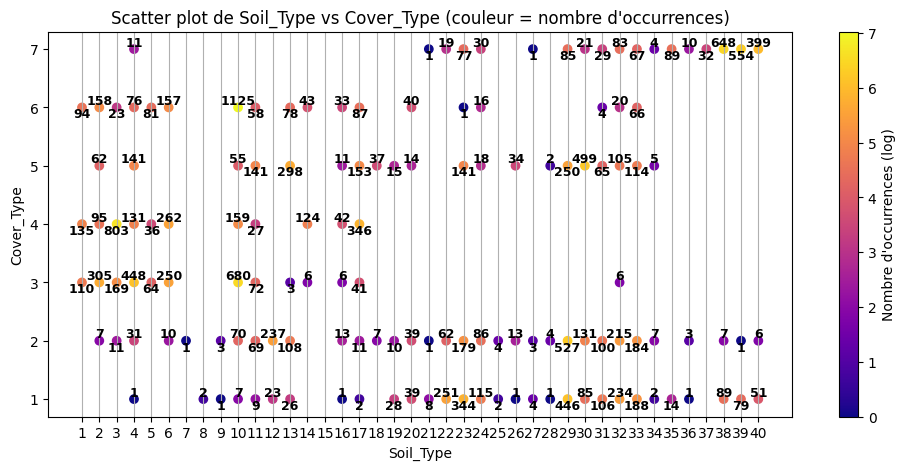

In [73]:
grouped_data = data_prov.groupby(['Soil_Type', 'Cover_Type']).size().reset_index(name='Count')

# Création du graphique
plt.figure(figsize=(12, 5))
scatter = plt.scatter(
    grouped_data['Soil_Type'],  # Abscisse
    grouped_data['Cover_Type'],  # Ordonnée
    c=np.log(grouped_data['Count']),  # Couleur en fonction de 'Count'
    cmap='plasma'  # Choix de la palette de couleurs (modifiable selon la préférence)
)

#Annotation pour afficher 'Count'
for i, row in grouped_data.iterrows():
    if row['Soil_Type']%2==0: #Affichage légèrement différent pour un Soil_Type sur 2 pour la lisibilité
        plt.text( #Fonction de texte
        row['Soil_Type'], #Position x
        row['Cover_Type'], #Position y
        str(row['Count']),  # Convertir la valeur en chaîne de caractères
        color='black',  # Couleur du texte
        ha='center', #Ancrage horizontal
        va='bottom', #Vertical
        fontsize=9, #Taille
        weight='bold'
        )
    else:
        plt.text(
        row['Soil_Type'], 
        row['Cover_Type'], 
        str(row['Count']), 
        color='black',      
        ha='center', 
        va='top', 
        fontsize=9,
        weight='bold'
        )


# Ajouter une barre de couleur pour représenter la densité
plt.colorbar(scatter, label='Nombre d\'occurrences (log)')

# Ajouter des labels et une grille
plt.xlabel('Soil_Type')
plt.ylabel('Cover_Type')
plt.title('Scatter plot de Soil_Type vs Cover_Type (couleur = nombre d\'occurrences)')
plt.xticks(range(data_prov['Soil_Type'].min(), data_prov['Soil_Type'].max() + 1, 1)) # Précision des abscisses
plt.grid(axis='x') #Grille vertical seulement
plt.show()


On s'apperçoit que le 'Soil_Type8' n'est présent que pour 'Cover_Type' = 1. On pourrait donc implémenter une règle de prédiction qui prédit 1 si 'Soil_Type'=8. Cependant, il faut se méfier de l'overfitting, car on a vu précédement qu'il n'y a que 2 apparitions de 'Soil_Type8', le comportement observé pourrait être un coup de chance, et dans tous les cas, la précision n'en sera a priori pas significativement améliorer à cause de la rareté de cette situation. De la même façon, 'Soil_Type7' n'est présent que pour 'Cover_Type' = 2 (1 apparition) et 'Soil_Type37' n'est présent que pour 'Cover_Type' = 7 (32 apparitions).

On observe aussi une situation particulière pour le 'Cover_Type' = 2 : Alors qu'il comprend majoritairement des 'Soil_Type' <= 17, il y a quelques données avec 'Soil_Type' = 32. Cela soulève en fait un aspect plus global : la "distance" entre les 'Soil_Type' n'est pas uniforme. En fait, les 'Soil_Type' renferment deux informations : une sur la zone climatique et une sur la zone géologique. Deux 'Soil_Type' qui ont ont une zone climatique commune peuvent être jugées plus proches que des 'Soil_Type' qui n'ont rien en commun.

On va donc essayer de reproduire le graphique ci-dessus mais avec les zones climatiques et géologiques.

In [49]:
# Info climatiques et géologiques pour chaque Soil_Type
climatic = [2]*6+[3]*2+[4]*5+[5]*2+[6]*3+[7]*16+[8]*6
geologic = [7,7,7,7,7,7,5,5,2,7,7,7,7,1,1,1,1,7,1,1,1,2,2]+[7]*17

data_prov['Climatic'] = data_prov['Soil_Type'].apply(lambda x: climatic[x - 1])
data_prov['Geologic'] = data_prov['Soil_Type'].apply(lambda x: geologic[x - 1])



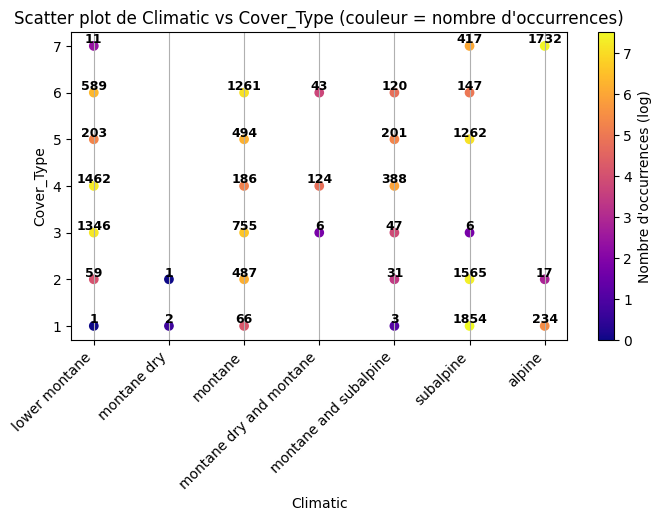

In [71]:
grouped_data = data_prov.groupby(['Climatic', 'Cover_Type']).size().reset_index(name='Count')

# Création du graphique
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    grouped_data['Climatic'],  # Abscisse
    grouped_data['Cover_Type'],  # Ordonnée
    c=np.log(grouped_data['Count']),  # Couleur en fonction de 'Count'
    cmap='plasma'
)

for i, row in grouped_data.iterrows():
    plt.text(
        row['Climatic'], 
        row['Cover_Type'], 
        str(row['Count']), 
        color='black',    
        ha='center', 
        va='bottom', 
        fontsize=9,
        weight='bold'
    )

# Ajouter une barre de couleur pour représenter la densité
plt.colorbar(scatter, label='Nombre d\'occurrences (log)')

# Ajouter des labels et une grille
plt.xlabel('Climatic')
plt.ylabel('Cover_Type')
plt.title('Scatter plot de Climatic vs Cover_Type (couleur = nombre d\'occurrences)')
labels = ['lower montane', 'montane dry', 'montane', 'montane dry and montane', ' montane and subalpine', 'subalpine', 'alpine']
plt.xticks(range(data_prov['Climatic'].min(), data_prov['Climatic'].max() + 1, 1), labels=labels, rotation=45, ha='right')
plt.grid(axis='x')
plt.show()

On voit que certain type de climat sont très peu représentés ("montane" et "montane dry and montane"). Aussi, on peut penser que certains types de climats sont plus proches que d'autres. Par exemple "subalpine" et "alpine" sont plutôt proches quand "alpine" et "lower montane". Ainsi, on pourrait avoir envie de prendre en compte la proximité entre les climats. En première approximation, on peut imaginer qu'ils se répartissent sur une échelle dans cet ordre :

lower montane < montane dry < montane dry and montane < montane < montane and subalpine < subalpine < alpine

Alors on pourrait construire un attribut quantitatif (entier ou réel) et non catégoriel pour le climat. Ainsi, on aurait une sorte de distance entre les climats. En plus, on peut imaginer jouer avec une répartition non uniforme des climats sur l'échelle créée.


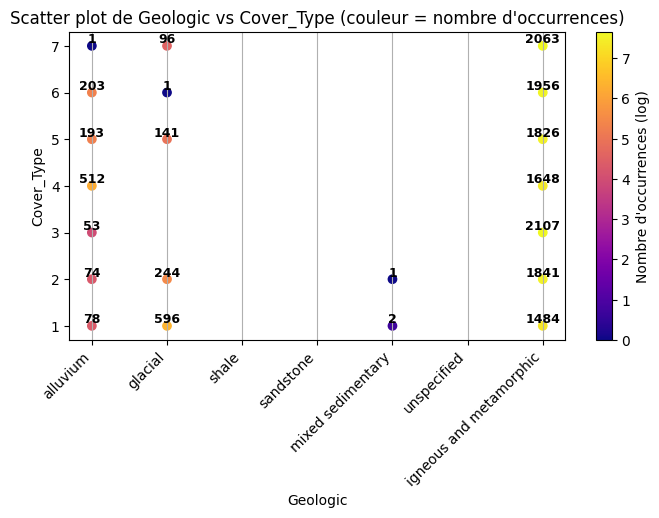

In [72]:
grouped_data = data_prov.groupby(['Geologic', 'Cover_Type']).size().reset_index(name='Count')

# Création du graphique
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    grouped_data['Geologic'],  # Abscisse
    grouped_data['Cover_Type'],  # Ordonnée
    c=np.log(grouped_data['Count']),  # Couleur en fonction de 'Count'
    cmap='plasma'
)

for i, row in grouped_data.iterrows():
    plt.text(
        row['Geologic'], 
        row['Cover_Type'], 
        str(row['Count']), 
        color='black',     
        ha='center', 
        va='bottom', 
        fontsize=9,
        weight='bold'
    )


# Ajouter une barre de couleur pour représenter la densité
plt.colorbar(scatter, label='Nombre d\'occurrences (log)')

# Ajouter des labels et une grille
plt.xlabel('Geologic')
plt.ylabel('Cover_Type')
plt.title('Scatter plot de Geologic vs Cover_Type (couleur = nombre d\'occurrences)')
labels = ['alluvium', 'glacial', 'shale', 'sandstone', 'mixed sedimentary', 'unspecified', 'igneous and metamorphic']
plt.xticks(range(data_prov['Geologic'].min(), data_prov['Geologic'].max() + 1, 1), labels=labels, rotation=45, ha='right')
plt.grid(axis='x')
plt.show()

On voit que les Soil_Type couvrent majoritairement 3 types de géologie (quelques uns en 'mixed sedimentary' aussi). 

### Relation Wilderness_area vs Cover_Type

On reproduit la méthode pour les attributs Wilderness_Area.

In [76]:
data_prov = data.copy()
# Liste des colonnes 'Soil_Type_1' à 'Soil_Type_40'
wilderness_columns = [f'Wilderness_Area{i}' for i in range(1, 5)]

# Calcul de la nouvelle colonne 'Soil_Type' en utilisant idxmax (donne le nom de la colonne Soil_TypeI non-nulle )
data_prov['Wilderness_Area'] = data_prov[wilderness_columns].idxmax(axis=1)

# Convertit 'Soil_Type_1' en l'entier correspondant (1, 2, ... , 40)
data_prov['Wilderness_Area'] = data_prov['Wilderness_Area'].apply(lambda x: int(x.replace('Wilderness_Area', '')))

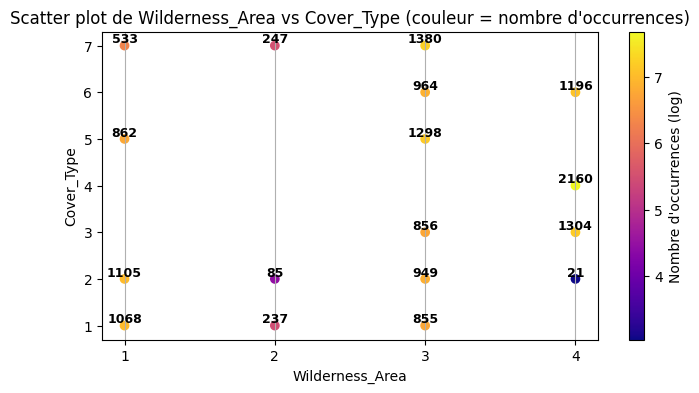

In [77]:
grouped_data = data_prov.groupby(['Wilderness_Area', 'Cover_Type']).size().reset_index(name='Count')

# Création du graphique
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    grouped_data['Wilderness_Area'],  # Abscisse
    grouped_data['Cover_Type'],  # Ordonnée
    c=np.log(grouped_data['Count']),  # Couleur en fonction de 'Count'
    cmap='plasma'
)

for i, row in grouped_data.iterrows():
    plt.text(
        row['Wilderness_Area'], 
        row['Cover_Type'], 
        str(row['Count']), 
        color='black',     
        ha='center', 
        va='bottom', 
        fontsize=9,
        weight='bold'
    )


# Ajouter une barre de couleur pour représenter la densité
plt.colorbar(scatter, label='Nombre d\'occurrences (log)')

# Ajouter des labels et une grille
plt.xlabel('Wilderness_Area')
plt.ylabel('Cover_Type')
plt.title('Scatter plot de Wilderness_Area vs Cover_Type (couleur = nombre d\'occurrences)')
plt.xticks(range(data_prov['Wilderness_Area'].min(), data_prov['Wilderness_Area'].max() + 1, 1))
plt.grid(axis='x')
plt.show()

Pour faire suite à cette première analyse, on pourait envisager, pour la phase d'apprentissage automatique, de remplacer l'attribut 'Soil_Type' par 'Climatic' et 'Geologic'.

On regarde alors la corrélation entre ces attribus et la classe cible à l'aide d'une table de contingence.

Cover_Type           1     2     3     4     5     6     7
Wilderness_Area                                           
Wilderness_Area1  1068  1105     0     0   862     0   533
Wilderness_Area2   237    85     0     0     0     0   247
Wilderness_Area3   855   949   856     0  1298   964  1380
Wilderness_Area4     0    21  1304  2160     0  1196     0


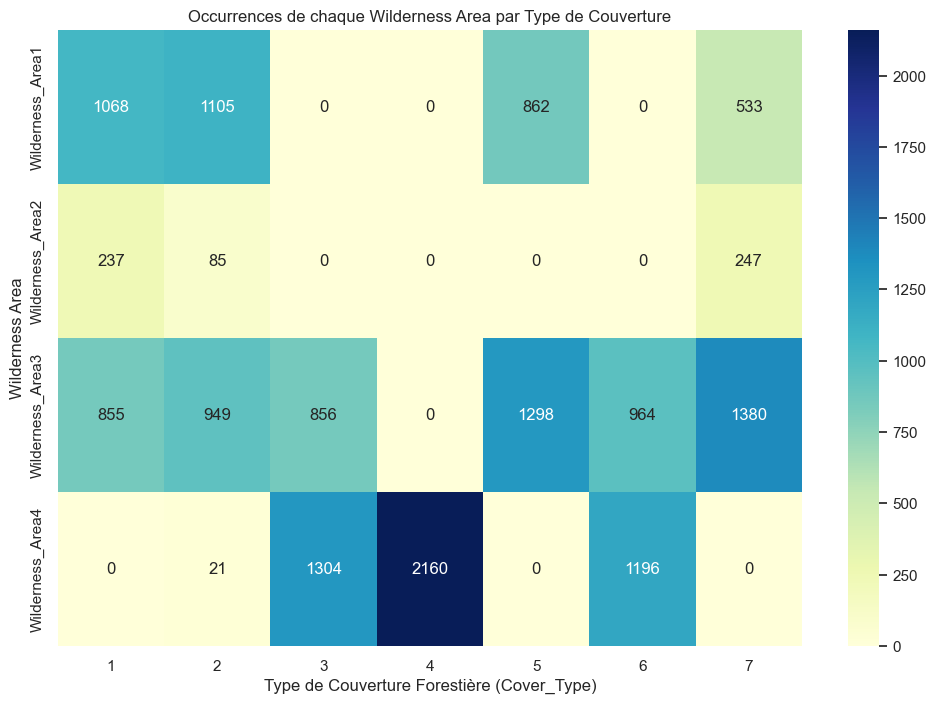

In [ ]:
# On compte les occurrences de chaque Cover_Type dans chaque Wilderness_Area
wilderness_cover_counts = data.melt(id_vars='Cover_Type', value_vars=wilderness_columns, 
                                    var_name='Wilderness_Area', value_name='Presence')
wilderness_cover_counts = wilderness_cover_counts[wilderness_cover_counts['Presence'] == 1]

# On crée la table de contingence
contingency_table = wilderness_cover_counts.groupby(['Wilderness_Area', 'Cover_Type']).size().unstack(fill_value=0)
print(contingency_table)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Occurrences de chaque Wilderness Area par Type de Couverture")
plt.xlabel("Type de Couverture Forestière (Cover_Type)")
plt.ylabel("Wilderness Area")
plt.show()

Cette analyse peut aider à affiner les modèles en mettant l'accent sur certaines zones de nature sauvage pour des types de couvertures particuliers, ce qui améliore la précision des prédictions.

### Analyse de la corrélation entre les variables continues

On étudie les corrélations entre les variables continues à l'aide d'une matrice de corrélation.

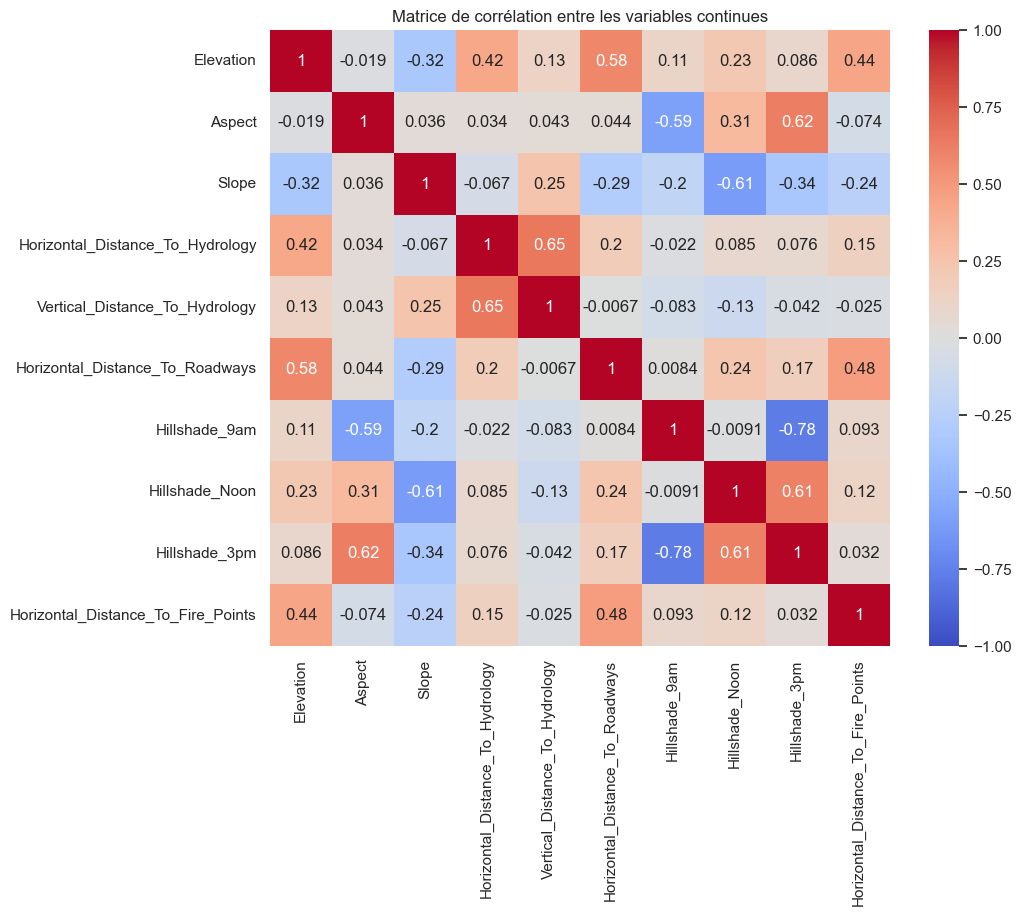

In [15]:
# On sélectionne les colonnes continues
continuous_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                      'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# On calcule la matrice de corrélation pour ces colonnes
correlation_matrix = data[continuous_columns].corr()

# On visualise la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre les variables continues")
plt.show()

On repère maintenant les paires d'attributs avec une grande corrélation

In [16]:
# On filtre pour les corrélations > 0.5 ou < -0.5 (en mettant à zéro les autres)
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
strong_correlations = strong_correlations.stack()  # Convertir en format long
strong_correlations = strong_correlations[strong_correlations != 1]  # Exclure les auto-corrélations (1.0)

# On filtre les doublons (garde seulement une des deux moitiés de la matrice)
strong_correlations = strong_correlations[~strong_correlations.index.duplicated()]

# On affiche les couples ayant une forte corrélation
print("Paires de variables ayant une corrélation absolue > 0.5 ou < -0.5 :")
for (var1, var2), corr_value in strong_correlations.items():
    print(f"{var1} et {var2} : Corrélation = {corr_value:.2f}")

Paires de variables ayant une corrélation absolue > 0.5 ou < -0.5 :
Elevation et Horizontal_Distance_To_Roadways : Corrélation = 0.58
Aspect et Hillshade_9am : Corrélation = -0.59
Aspect et Hillshade_3pm : Corrélation = 0.62
Slope et Hillshade_Noon : Corrélation = -0.61
Horizontal_Distance_To_Hydrology et Vertical_Distance_To_Hydrology : Corrélation = 0.65
Vertical_Distance_To_Hydrology et Horizontal_Distance_To_Hydrology : Corrélation = 0.65
Horizontal_Distance_To_Roadways et Elevation : Corrélation = 0.58
Hillshade_9am et Aspect : Corrélation = -0.59
Hillshade_9am et Hillshade_3pm : Corrélation = -0.78
Hillshade_Noon et Slope : Corrélation = -0.61
Hillshade_Noon et Hillshade_3pm : Corrélation = 0.61
Hillshade_3pm et Aspect : Corrélation = 0.62
Hillshade_3pm et Hillshade_9am : Corrélation = -0.78
Hillshade_3pm et Hillshade_Noon : Corrélation = 0.61


On ne prend pas en compte les corrélations entre les variables Hillshade que nous avons déjà traité précédemment.

Les paires de variables avec une forte corrélation sont : 
- Slope et Hillshade_Noon : Corrélation = $-0.61$
- Aspect et Hillshade_9am : Corrélation = $-0.59$ et Aspect et Hillshade_3pm : Corrélation = $0.62$
- Horizontal_Distance_To_Hydrology et Vertical_Distance_To_Hydrology : Corrélation = $0.65$
- Horizontal_Distance_To_Roadways et Elevation : Corrélation = $0.58$

Pour mieux visualiser les corrélations, on trace des scatter plots pour les paires d'attributs avec une forte corrélation.


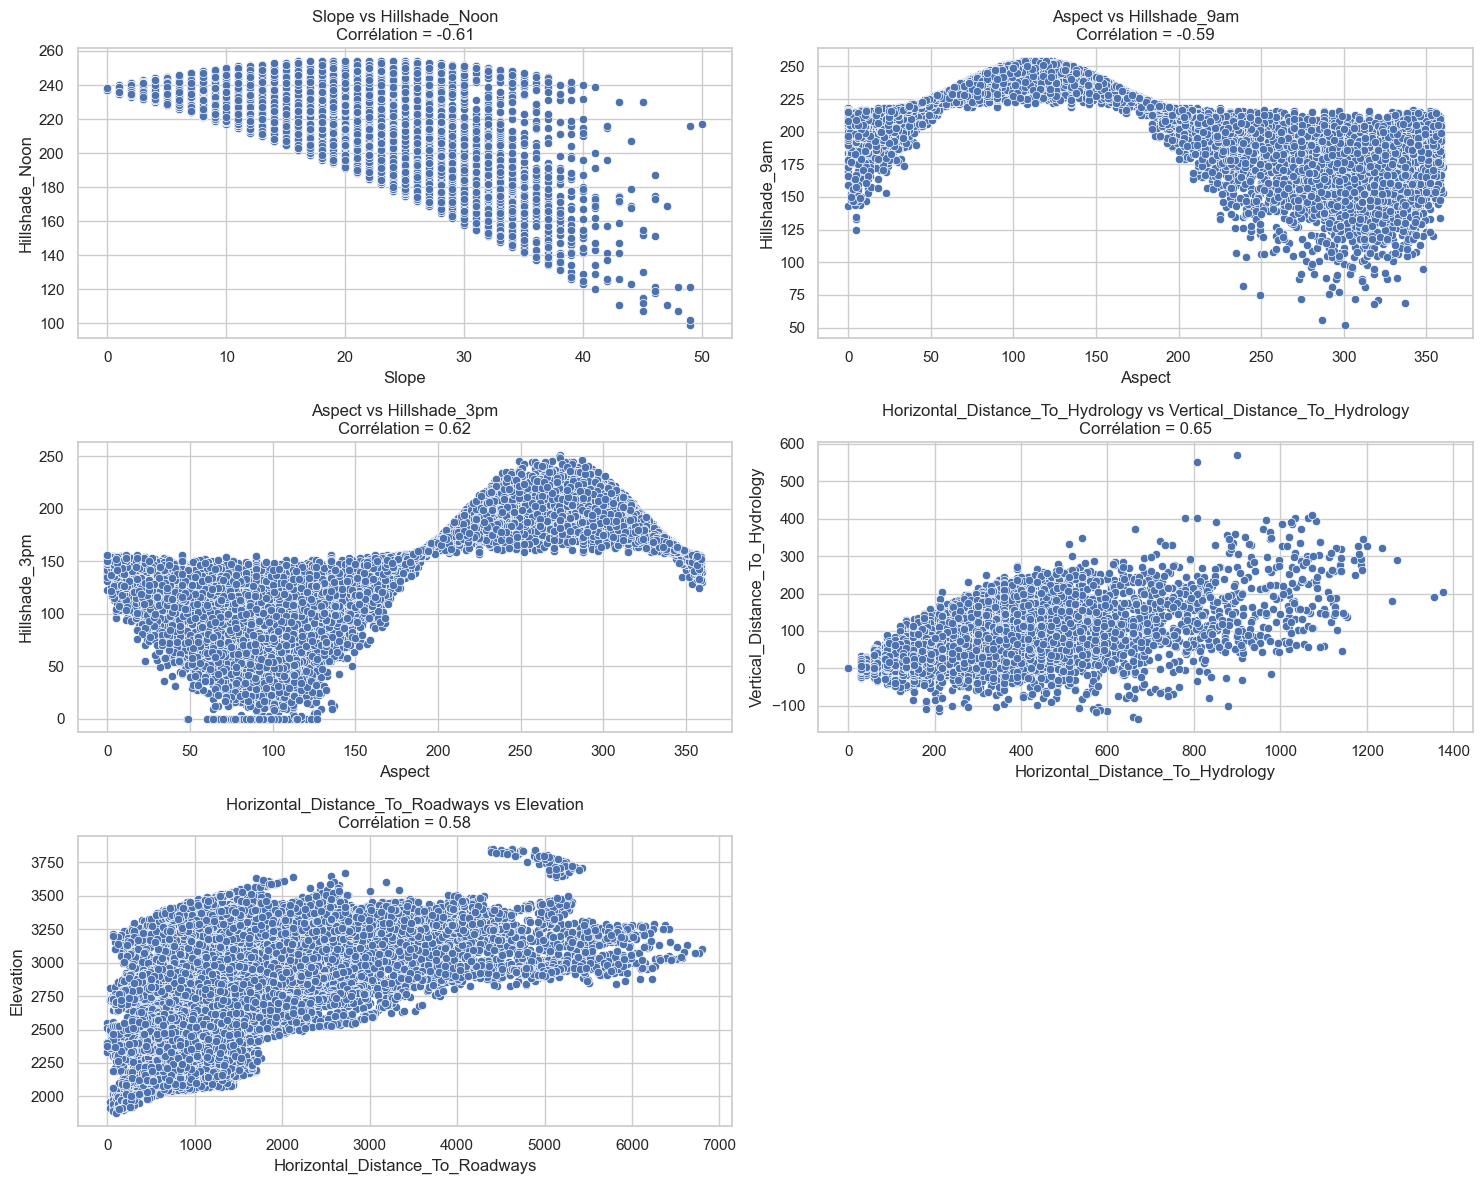

In [19]:
# Paramétrer le style
sns.set(style="whitegrid")

# Taille de la figure globale
plt.figure(figsize=(15, 12))

# Slope vs Hillshade_Noon (corrélation = -0.61)
plt.subplot(3, 2, 1)
sns.scatterplot(data=data, x="Slope", y="Hillshade_Noon")
plt.title("Slope vs Hillshade_Noon\nCorrélation = -0.61")

# Aspect vs Hillshade_9am (corrélation = -0.59)
plt.subplot(3, 2, 2)
sns.scatterplot(data=data, x="Aspect", y="Hillshade_9am")
plt.title("Aspect vs Hillshade_9am\nCorrélation = -0.59")

# Aspect vs Hillshade_3pm (corrélation = 0.62)
plt.subplot(3, 2, 3)
sns.scatterplot(data=data, x="Aspect", y="Hillshade_3pm")
plt.title("Aspect vs Hillshade_3pm\nCorrélation = 0.62")

# Horizontal_Distance_To_Hydrology vs Vertical_Distance_To_Hydrology (corrélation = 0.65)
plt.subplot(3, 2, 4)
sns.scatterplot(data=data, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology")
plt.title("Horizontal_Distance_To_Hydrology vs Vertical_Distance_To_Hydrology\nCorrélation = 0.65")

# Horizontal_Distance_To_Roadways vs Elevation (corrélation = 0.58)
plt.subplot(3, 2, 5)
sns.scatterplot(data=data, x="Horizontal_Distance_To_Roadways", y="Elevation")
plt.title("Horizontal_Distance_To_Roadways vs Elevation\nCorrélation = 0.58")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

- Slope et Hillshade_Noon : On observe une relation linéaire négative entre ces deux variables. Cela signifie que les pentes plus raides sont associées à des ombrages plus faibles à midi.
- Aspect et Hillshade_9am/Hillshade_3pm : On remarque une variation cyclique. L'orientation influence fortement l'ombrage à différentes heures de la journée, ce qui est cohérent avec la position du soleil.
- Horizontal_Distance_To_Hydrology et Vertical_Distance_To_Hydrology : On observe une forme elliptique. 
- Horizontal_Distance_To_Roadways et Elevation : On observe que les points éloignés des routes sont généralement plus élevés.

### Corrélation entre Wilderness_Area et Elevation

Les zones géographiques sont peut-être liées à l'altitude. On peut donc s'attendre à une corrélation entre Wilderness_Area et Elevation.

On va visualiser les distributions d'altitude pour chaque zone géographique.

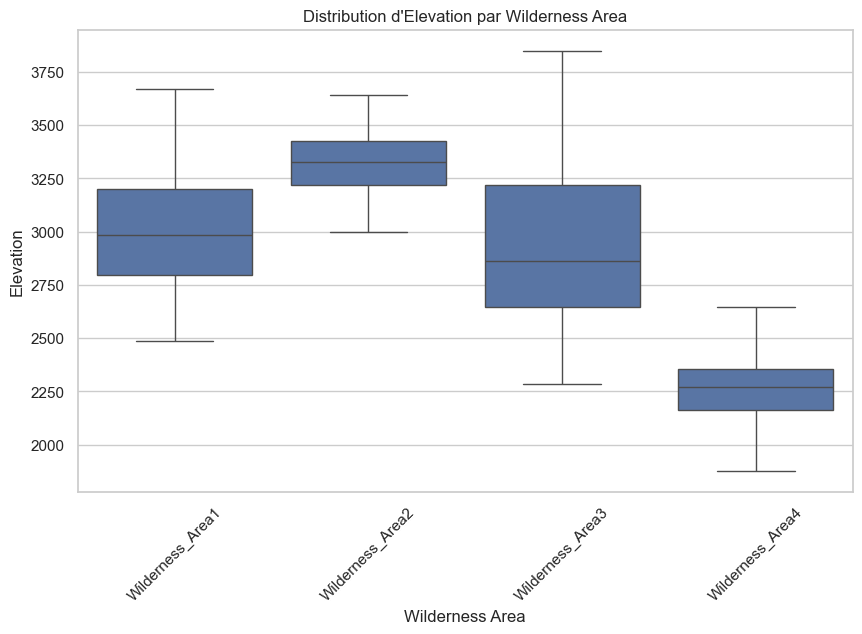

In [22]:
# On fusionne les colonnes Wilderness_Area en une seule colonne pour faciliter l'affichage
data_long = data.melt(id_vars='Elevation', value_vars=wilderness_columns, var_name='Wilderness_Area', value_name='Presence')
data_long = data_long[data_long['Presence'] == 1]  # Filtrer pour les Wilderness Area présentes

# On crée les box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_long, x='Wilderness_Area', y='Elevation')
plt.title("Distribution d'Elevation par Wilderness Area")
plt.xlabel("Wilderness Area")
plt.ylabel("Elevation")
plt.xticks(rotation=45)
plt.show()

Wilderness_Area1 et Wilderness_Area3 ont des distributions similaires et une grande variabilité d'altitude, cela suggère qu'elles couvrent des terrains diversifiés en termes d'altitude.

Wilderness_Area2 est concentré à des altitudes plus élevées avec une plage plutôt restreinte, ce qui pourrait indiquer une zone de montagne ou de plateau.

Wilderness_Area4, est significativement plus basse en altitude et moins variable, ce qui suggère qu'elle est située dans une zone de basse altitude, une plaine ou un vallon.
Wilderness_Area4 pourrait alors abriter une faune et une flore différentes de celles des zones de plus haute altitude. 
Cela est confirmé par la table de contingence que nous avons réalisé précédemment.

### Attributs susceptibles d'avoir le plus grand impact

Cela reste à vérifier cela avec les modèles. Par exemple, le modèle Random Forest permet de calculer l'impact des caractéristiques.

In [ ]:
# Corrélation avec la variable cible
target_corr = data.corr()['Cover_Type'].sort_values(ascending=False)
print(target_corr)



<bound method NDFrame.abs of Cover_Type                            1.000000
Soil_Type38                           0.254248
Soil_Type39                           0.234777
Soil_Type40                           0.199545
Soil_Type10                           0.140102
Wilderness_Area3                      0.137298
Soil_Type35                           0.090457
Slope                                 0.086536
Wilderness_Area4                      0.074817
Vertical_Distance_To_Hydrology        0.070615
Soil_Type37                           0.069080
Soil_Type17                           0.042376
Id                                    0.034812
Soil_Type5                            0.029799
Soil_Type13                           0.028677
Soil_Type14                           0.024875
Soil_Type36                           0.022832
Soil_Type1                            0.017423
Soil_Type16                           0.016646
Elevation                             0.014241
Soil_Type18                    